# Good morning!

Welcome back to Day 4 of PyCamp!

Yesterday, we finished up our tour of `numpy` by learning how to import, clean, and explore external data using the techniques we learned on Tuesday. That's a lot of material that we covered in only three days!

Today's material will focus on `pandas`, a powerful Python data science package that provides infrastructure for working with complex tabular data. After we finish today's content, you'll largely be prepared to work with your own data using the techniques we've covered in PyCamp. Without further ado, let's get started!

In [ ]:
# make sure to run this cell to import the external files we need for today
# and load in the appropriate packages
!git clone https://github.com/ccbskillssem/pythonbootcamp.git

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Cloning into 'pythonbootcamp'...
remote: Enumerating objects: 106, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 106 (delta 1), reused 2 (delta 0), pack-reused 98
Receiving objects: 100% (106/106), 43.49 MiB | 17.37 MiB/s, done.
Resolving deltas: 100% (29/29), done.
Updating files: 100% (48/48), done.


## DataFrames versus arrays

Yesterday, we *very briefly* touched upon the motivation behind using `pandas` in complement with `numpy`. We discussed that the main attraction of `pandas` is the data type it introduces: the **DataFrame**.

1. **DataFrames allow mixed types.** Unlike with arrays, you can store strings, integers, numerics, etc. in the same DataFrame.
2. **DataFrames supports row and column names**. You can index with row and column names! This can be handy if you know your sample/variable names by heart.
3. **DataFrames support easy database-like operations**. Merging, joining, grouping, sorting on a column's values – all possible with `pandas` DataFrames!

Today's morning session will cover the essentials of working with DataFrames. The operations you'll learn about are quite similar to operations you've performed with arrays, so hopefully they feel intuitive to you!

## Importing external data

> Most of the time, you'll want to use `pandas` for working with external data: thus, we won't discuss how to create DataFrames from scratch. If you'd like to learn how to do that, you can review the documentation [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#dataframe).

Let's start by playing around with some sample data. `pandas`, like `numpy`, uses a function to read in external data with a file path. You can choose from one of the following functions, depending on your file type:

* `pd.read_csv()` is used for importing `.csv` (comma-separated value) files.
* `pd.read_table()` is used for importing `.tsv` (tab-separated value) files.
* `pd.read_excel()` is used for importing `.xls` or `.xlsx` (Excel) files.

For more data import functions, you can read the quick tutorial on importing data [here](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/02_read_write.html), or review the full file input documentation for `pandas` [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html).<br><br>
___
<br>

Let's start by testing out one of these import functions with a new dataset, `alleles`.

`alleles` is a dataset that describes **alleles** (genetic variants/mutations) associated with metabolic diseases. It has a number of columns that denote properties, such as the genomic location of the allele, the identity of the allele compared to the human *reference genome*), and the frequencies of each allele across multiple global populations.

> This dataset was curated from publicly available data by a former CCB PhD student and PyCamp instructor, [Andrew Sharo](https://www.andrewsharo.com/). (Thanks, Andrew!)


Here's the file path:

```
'/content/pythonbootcamp/day_4/alleles.tsv'
```

Because `alleles` is stored in a `.tsv` file, we should use `pd.read_table()` to import it. This works just like `np.genfromtxt()`, except we don't need to provide the delimiter: `pd.read_table()` takes care of that for us.

In [2]:
alleles = pd.read_table('/content/pythonbootcamp/day_4/alleles.tsv')
print(type(alleles)) # note that it's a new type

<class 'pandas.core.frame.DataFrame'>


In [3]:
# run this cell to inspect the table
alleles

,chromosome,position,ID,reference,alternative,quality,filter,AF,AFR_AF,AMR_AF,EAS_AF,EUR_AF,SAS_AF
0,1,11784770,rs4845883,A,G,94.0,PASS,0.933506,0.7617,0.9741,1.000,1.000,1.0000
1,1,11784774,rs139412854,C,T,96.0,PASS,0.000200,0.0008,0.0000,0.000,0.000,0.0000
2,1,11784812,rs548376994,A,G,98.0,PASS,0.000200,0.0000,0.0000,0.001,0.000,0.0000
3,1,11784816,rs569782256,G,A,96.0,PASS,0.000200,0.0000,0.0000,0.001,0.000,0.0000
4,1,11784829,rs537101792,G,A,95.0,PASS,0.000200,0.0000,0.0000,0.000,0.000,0.0010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146577,22,30628237,rs187829200,G,C,100.0,PASS,0.000200,0.0000,0.0000,0.001,0.000,0.0000
146578,22,30628242,rs563299082,C,A,97.0,PASS,0.000599,0.0000,0.0000,0.000,0.000,0.0031
146579,22,30628249,rs73398315,C,G,100.0,PASS,0.066494,0.2428,0.0159,0.000,0.001,0.0000
146580,22,30628260,rs370947798,C,T,100.0,PASS,0.000200,0.0008,0.0000,0.000,0.000,0.0000


Colab has built-in functionality for displaying DataFrames in a more structured, human-readable manner, compared to `numpy` arrays. Let's go ahead and inspect the table.

## Inspecting DataFrame displays

First, notice that DataFrame row indices/names are displayed with **bold face**, and column names are displayed with a `different font`.
 Notice that `pd.read_table()` automatically assigned our column names to the first row of our dataset containing strings: if we imported this data with `np.genfromtxt()`, this column name row would have been all `nan` values.



⏸ **Exercise 1**: Use ```np.genfromtxt()``` and observe the output. What do you notice? Compare it to the pandas DataFrame from above. What are the differences? Can you think of a situation where a ```numpy``` DataFrame would be a better choice?

In [5]:
### write your code below ###
np.genfromtxt('/content/pythonbootcamp/day_4/alleles.tsv', '\t')

array([[      -1,       -1,       -1, ...,       -1,       -1,       -1],
       [       1, 11784770,       -1, ...,        1,        1,        1],
       [       1, 11784774,       -1, ...,        0,        0,        0],
       ...,
       [      22, 30628249,       -1, ...,        0,        0,        0],
       [      22, 30628260,       -1, ...,        0,        0,        0],
       [      22, 30628270,       -1, ...,        0,        0,        0]],
      dtype=int64)

Back to the pandas DataFrame. Take a look at the bottom left of the table: the shape attribute is automatically displayed each time that a table is returned to the output. This is convenient for making sure that we've imported all the rows and columns that we expect!

> *Note*: There are literally dozens of optional parameters that you can use to specify how your data is imported! We won't cover them today for the sake of brevity, but we encourage you to review the options [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html) before you import your own data. There's an optional parameter for almost every quirk that you'll encounter in your data!

# Parsing DataFrames

We now turn to the standard parsing operations we need to know to work with DataFrames, such as indexing.

Although most of these closely mirror the `numpy` operations we already learned about, **we highly encourage you to follow along with your `pandas` cheat sheet**. Remember, syntax will come naturally with practice, so don't burn out trying to memorize all of the methods and functions!

### Accessing attributes

We can access attributes of `pandas` DataFrames in *exactly* the same manner as `numpy` arrays. They even share the same attribute names:

* `.shape`: Returns a tuple with the number of rows and columns in the DataFrame.
* `.size`: Returns a tuple with the number of elements in the DataFrame.
* `.ndim`: Returns a tuple with the number of dimensions in the DataFrame.

In [6]:
# try it out:
# print these attributes of alleles

print(alleles.shape)
print(alleles.size)
print(alleles.ndim)

(146582, 13)
1905566
2


### Row/column labels

Row and column **labels** (a generic term that encompasses both default numerical indices or assigned row/column names) can be accessed through the DataFrame's attributes.

Column labels can be accessed through the `.columns` attribute.

In [7]:
# inspecting the column labels
alleles.columns

Index(['chromosome', 'position', 'ID', 'reference', 'alternative', 'quality',
       'filter', 'AF', 'AFR_AF', 'AMR_AF', 'EAS_AF', 'EUR_AF', 'SAS_AF'],
      dtype='object')

Row labels can be accessed through the `.index` attribute. (We wish it was `.rows` too, and we don't know why it isn't.)

In [8]:
# inspecting the row labels
alleles.index

RangeIndex(start=0, stop=146582, step=1)

You'll notice that both row and column labels are stored in a special data structure called an **Index**: thus, each DataFrame will have two associated Index structures, one for the rows and one for the columns.

Indexes can come in multiple flavors depending on the labels of the DataFrame, such as the above `RangeIndex` (an index of sequential integers, like our conventional zero-index): nevertheless, they're all considered to be Index structures.

There are a number of advanced operations you can perform with Index methods, but they're beyond the scope of this bootcamp, and you'll probably only use them if you become an advanced `pandas` user. For today's purposes, an Index is just a fancy iterable that contains row/column labels.

> If you *do* want to know more about Index structures, you can read about all their properties [here](https://pandas.pydata.org/pandas-docs/stable/reference/indexing.html).

## Indexing columns

Columns of DataFrames are much more intuitive to index than columns of arrays. You can slice the values of a single column by indexing with the column label.

```
dataframe[column_label]
```

In [9]:
alleles['ID']

0           rs4845883
1         rs139412854
2         rs548376994
3         rs569782256
4         rs537101792
             ...     
146577    rs187829200
146578    rs563299082
146579     rs73398315
146580    rs370947798
146581    rs150242007
Name: ID, Length: 146582, dtype: object

⏸ **Exercise 2** Take a few minutes to look at the columns in ```alleles```. What are the different ```dtypes``` in this DataFrame? If you have time (and want a challenge), play around with Index Structures and the parameters with ```pd.read_csv()```.

Each column of a DataFrame is stored in another special data type called a **Series**. For our purposes, a Series is essentially a one-dimensional DataFrame that only has one associated Index (for the row labels).

In [10]:
# try it out:
# 1. print the type of the ID column
# 2. print the row labels of the ID column

print(type(alleles['ID']))
print(alleles['ID'].index)

<class 'pandas.core.series.Series'>
RangeIndex(start=0, stop=146582, step=1)


Notice that the Series shares the same row labels as the original DataFrame. In this manner, we always preserve essential context with our data.

<img src ='https://github.com/ccbskillssem/pythonbootcamp/raw/main/day_4/ColumnIndex.png'>

We can slice multiple columns by providing a list of column names: the selected columns will display as a DataFrame.

In [11]:
# try it out:
# index the chromosome, position, and ID columns

alleles[['chromosome', 'position','ID']]

,chromosome,position,ID
0,1,11784770,rs4845883
1,1,11784774,rs139412854
2,1,11784812,rs548376994
3,1,11784816,rs569782256
4,1,11784829,rs537101792
...,...,...,...
146577,22,30628237,rs187829200
146578,22,30628242,rs563299082
146579,22,30628249,rs73398315
146580,22,30628260,rs370947798


## Indexing rows and cells

DataFrame rows are indexed similarly to array rows, with a minor syntax difference. With DataFrames, we use `.loc[]` instead of `[]` to access rows.

```
dataframe.loc[row_label]
```

In [12]:
# try it out:
# use .loc[] to get the first row of alleles

alleles.loc[0]

chromosome             1
position        11784770
ID             rs4845883
reference              A
alternative            G
quality             94.0
filter              PASS
AF              0.933506
AFR_AF            0.7617
AMR_AF            0.9741
EAS_AF               1.0
EUR_AF               1.0
SAS_AF               1.0
Name: 0, dtype: object

Just as with columns, rows of DataFrames are also stored in Series structures: the only difference is that the column labels have been transposed to row labels, as a Series only has one Index for row labels.

<img src='https://raw.githubusercontent.com/ccbskillssem/pythonbootcamp/main/day_4/RowIndex.png'>

It can help to think of a DataFrame as a Lego-like structure composed of Series. When we slice the DataFrame, we're snapping off some of the Legos from the main structure.

In [13]:
# try it out:
# 1. print the type of the first row
# 2. print the index of the first row

print(type(alleles.loc[0]))
print(alleles.loc[0].index)

<class 'pandas.core.series.Series'>
Index(['chromosome', 'position', 'ID', 'reference', 'alternative', 'quality',
       'filter', 'AF', 'AFR_AF', 'AMR_AF', 'EAS_AF', 'EUR_AF', 'SAS_AF'],
      dtype='object')


We can use `.loc[]` to slice rows, just as we did with arrays.
> Interestingly, the authors of `pandas` opted to make slicing ranges *inclusive* of the right index. This may or may not feel more intuitive to you, but just keep in mind that this is the exception rather than the rule for ranges in Python.

In [14]:
# try it out:
# use .loc[] to slice the 0 to 10-indexed rows of alleles
# notice that the right index is now *inclusive*

alleles.loc[0:10]

,chromosome,position,ID,reference,alternative,quality,filter,AF,AFR_AF,AMR_AF,EAS_AF,EUR_AF,SAS_AF
0,1,11784770,rs4845883,A,G,94.0,PASS,0.933506,0.7617,0.9741,1.000,1.000,1.000
1,1,11784774,rs139412854,C,T,96.0,PASS,0.000200,0.0008,0.0000,0.000,0.000,0.000
2,1,11784812,rs548376994,A,G,98.0,PASS,0.000200,0.0000,0.0000,0.001,0.000,0.000
3,1,11784816,rs569782256,G,A,96.0,PASS,0.000200,0.0000,0.0000,0.001,0.000,0.000
4,1,11784829,rs537101792,G,A,95.0,PASS,0.000200,0.0000,0.0000,0.000,0.000,0.001
5,1,11784836,rs185758729,G,A,97.0,PASS,0.000399,0.0015,0.0000,0.000,0.000,0.000
6,1,11784867,rs570422232,C,T,97.0,PASS,0.000399,0.0000,0.0014,0.000,0.000,0.001
7,1,11784972,rs539002016,T,C,98.0,PASS,0.000200,0.0008,0.0000,0.000,0.000,0.000
8,1,11785056,rs11587953,G,A,95.0,PASS,0.933506,0.7617,0.9741,1.000,1.000,1.000
9,1,11785071,rs572626352,G,A,91.0,PASS,0.000399,0.0000,0.0000,0.000,0.000,0.002


We can also use `.loc[]` to access individual cells in an array-like manner.

```
dataframe.loc[row_label, column_label]
```

In [15]:
# try it out:
# access the ID for the 5-indexed row
alleles.loc[5,'ID']

'rs185758729'

This holds for accessing multiple rows and multiple columns.

In [16]:
# accessing the ID for the 0 to 10-indexed rows
alleles.loc[0:10, 'ID']

0       rs4845883
1     rs139412854
2     rs548376994
3     rs569782256
4     rs537101792
5     rs185758729
6     rs570422232
7     rs539002016
8      rs11587953
9     rs572626352
10    rs149530892
Name: ID, dtype: object

In [17]:
# try it out:
# access both the position and ID for the 0 to 10-indexed rows

alleles.loc[0:10, ['position', 'ID']]

,position,ID
0,11784770,rs4845883
1,11784774,rs139412854
2,11784812,rs548376994
3,11784816,rs569782256
4,11784829,rs537101792
5,11784836,rs185758729
6,11784867,rs570422232
7,11784972,rs539002016
8,11785056,rs11587953
9,11785071,rs572626352


⏸ **Exercise 3** Subset the allele frequencies for the different geographic superpopulations from ```alleles``` (`AFR_AF`, `EUR_AF`, etc) as well as the ```AF``` column.

In [18]:
### write your code below ###
alleles[['AF', 'AFR_AF', 'EUR_AF', 'EAS_AF', 'SAS_AF', 'AMR_AF']]

,AF,AFR_AF,EUR_AF,EAS_AF,SAS_AF,AMR_AF
0,0.933506,0.7617,1.000,1.000,1.0000,0.9741
1,0.000200,0.0008,0.000,0.000,0.0000,0.0000
2,0.000200,0.0000,0.000,0.001,0.0000,0.0000
3,0.000200,0.0000,0.000,0.001,0.0000,0.0000
4,0.000200,0.0000,0.000,0.000,0.0010,0.0000
...,...,...,...,...,...,...
146577,0.000200,0.0000,0.000,0.001,0.0000,0.0000
146578,0.000599,0.0000,0.000,0.000,0.0031,0.0000
146579,0.066494,0.2428,0.001,0.000,0.0000,0.0159
146580,0.000200,0.0008,0.000,0.000,0.0000,0.0000


In [19]:
### write your code below ###
alleles.loc[:,'AF':'SAS_AF']

,AF,AFR_AF,AMR_AF,EAS_AF,EUR_AF,SAS_AF
0,0.933506,0.7617,0.9741,1.000,1.000,1.0000
1,0.000200,0.0008,0.0000,0.000,0.000,0.0000
2,0.000200,0.0000,0.0000,0.001,0.000,0.0000
3,0.000200,0.0000,0.0000,0.001,0.000,0.0000
4,0.000200,0.0000,0.0000,0.000,0.000,0.0010
...,...,...,...,...,...,...
146577,0.000200,0.0000,0.0000,0.001,0.000,0.0000
146578,0.000599,0.0000,0.0000,0.000,0.000,0.0031
146579,0.066494,0.2428,0.0159,0.000,0.001,0.0000
146580,0.000200,0.0008,0.0000,0.000,0.000,0.0000


Can you determine what proportion of the dataset is represented by ```EAS```? How about ```SAS```?

*Hint 1*: Look at the third and fifth rows. You can use df.loc to access the desired rows.

*Hint 2*:
If $X$ is number of people with the mutation

$$AF= \frac{X}{total}$$

$$AF_{EAS}=\frac{X_{EAS}}{total_{EAS}}$$

if $X=X_{EAS}$
$$proportion_{EAS}=\frac{AF}{AF_{EAS}}$$

In [20]:
### write your code below ###
proportionEAS=alleles.loc[2,'AF']/alleles.loc[2,'EAS_AF']
proportionSAS=alleles.loc[4,'AF']/alleles.loc[4,'SAS_AF']

print(proportionEAS, proportionSAS)

0.19968099292947203 0.19968099292947203


⏸ **Exercise 4** Can you access the position and allele frequency for the even numbered indexes in the first 20 rows?

Hint: You can use ``np.arange()`` to generate an array of even integers. Refer to documentation.

In [21]:
### write your code below ###
alleles.loc[np.arange(0, 21, 2), ['position', 'AF']]

,position,AF
0,11784770,0.933506
2,11784812,0.000200
4,11784829,0.000200
6,11784867,0.000399
8,11785056,0.933506
10,11785080,0.027157
12,11785110,0.118011
14,11785113,0.000200
16,11785165,0.120807
18,11785215,0.000998


## Summary

Let's recap all of this before we head into our exercises. You'll find this info on your cheat sheet as well, of course, but make sure that it *makes sense* too!

* Attributes
  * You can access the core attributes of a DataFrame using the same attribute names that we learned for `numpy` arrays: `.shape`, `.size`, and `.ndim`.
  * You can obtain row and column labels by using the `.columns` and `.index` attributes.

* Indexing
  * You can index a single column using:
  ```
  dataframe[column_name]
  ```
  * You can index multiple columns using:
  ```
  dataframe[[column_name_1, column_name_2...]]
  ```
  * You can index a single row using:
    ```
    dataframe.loc[row_name]
    ```
  * You can index multiple (numeric-index) rows using:
    ```
    dataframe.loc[firstrow:lastrow]
    ```
    This slice will be *inclusive* of `lastrow`.
  * You can index a single element (cell) using:
    ```
    dataframe.loc[row_name, column_name]
    ```

# Data exploration with DataFrames

## Simple methods

Now that we're up to speed on how to parse DataFrames, we can learn about the utility that `pandas` has for data exploration. We'll cover many of the same topics that we did with `numpy`, and the conceptual basis of why we want to perform these operations remains the same between the two packages.

We've already mentioned that DataFrames share a great number of similarities with `numpy` arrays. The first (and more important) similarity is that DataFrames *also* allow us to perform vectorized operations.

> *Wait, then why did we even learn `numpy`?*<br>
  Because there's no such thing as a free lunch. Remember how we mentioned that `numpy` is efficient because it only permits data of a single type? Well, `pandas` is [slower](https://towardsdatascience.com/speed-testing-pandas-vs-numpy-ffbf80070ee7) than `numpy`, even for vectorized operations, because it has to take non-numeric types into account. This is why we taught you `numpy` first: if you're working with strictly numeric values, then `numpy` arrays will be a more efficient solution.

DataFrames and Series share many of the same methods: this makes sense in light of our Lego analogy. Moreover, the majority of methods we learned with `numpy` arrays are identical in name and function to methods for DataFrames/Series.
* `.sum()`
* `.min()`
* `.max()`
* `.mean()`
* `.std()`
* `.median()` (Rejoice at the availability of a median method!)

Just like with arrays, these methods take an `axis` parameter to specify column-wise or row-wise operation. You can provide either an integer or a string value, whichever is more intuitive for you.
* `0` or `'columns'` refers to column-wise operations.
* `1` or `'rows'` refers to row-wise operations.

In [22]:
# try it out:
# get the average frequency for all alleles in the table

alleles['AF'].mean(axis = 0)

0.03786874073814257

In [23]:
# try it out:
# find the average allele frequencies of the AFR_AF and EAS_AF columns

alleles[['AFR_AF', 'EAS_AF']].mean(axis = 0)

AFR_AF    0.040214
EAS_AF    0.037553
dtype: float64

`pandas` also offers some additional convenient methods for DataFrames/Series that weren't available (or weren't particularly useful) for arrays. These methods can be useful for quick data exploration, which we'll try out in the exercises.

* `.head()` and `.tail()` return the first or last five rows of the dataset. This can be useful for quickly viewing the result of an operation, or testing out an operation on a small subset of the DataFrame.
  * You can specify a specific number of rows by passing an integer to the method input: for example, `.head(15)` would yield the first 15 rows.
* `.value_counts()` returns a new DataFrame or Series that shows the count of each unique value.
* `.describe()` returns a new DataFrame or Series with conventional summary statistics (`count`, `min`, `max`, `mean`, `std`), as well as 25, 50, and 75 percentile values.
* `.unique()` returns a sorted array containing the unique values of a DataFrame or Series.
  * Yes, an array, not a Series or DataFrame! This is an example of how `pandas` really just works as an expansion pack for `numpy`.

In [24]:
# let's pop open a quick preview of alleles
alleles.head()

,chromosome,position,ID,reference,alternative,quality,filter,AF,AFR_AF,AMR_AF,EAS_AF,EUR_AF,SAS_AF
0,1,11784770,rs4845883,A,G,94.0,PASS,0.933506,0.7617,0.9741,1.000,1.0,1.000
1,1,11784774,rs139412854,C,T,96.0,PASS,0.000200,0.0008,0.0000,0.000,0.0,0.000
2,1,11784812,rs548376994,A,G,98.0,PASS,0.000200,0.0000,0.0000,0.001,0.0,0.000
3,1,11784816,rs569782256,G,A,96.0,PASS,0.000200,0.0000,0.0000,0.001,0.0,0.000
4,1,11784829,rs537101792,G,A,95.0,PASS,0.000200,0.0000,0.0000,0.000,0.0,0.001


In [25]:
# how many alleles passed the quality filter?
alleles['filter'].value_counts()

filter
PASS    141585
LowQ      4997
Name: count, dtype: int64

In [26]:
# let's look at the summary of quality scores
alleles['quality'].describe()

count    146582.000000
mean         94.944400
std           2.888233
min          81.000000
25%          93.000000
50%          95.000000
75%          97.000000
max         100.000000
Name: quality, dtype: float64

In [28]:
# check which chromosomes are covered in this dataset
alleles['chromosome'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  9, 10, 11, 12, 13, 14, 15, 16, 17, 19,
       20, 21, 22])

⏸ **Exercise 5a** How many unique values of allele frequency do you observe in `AF`?

In [29]:
### write your code below ###
len(alleles['AF'].unique())

4100

⏸ **Exercise 5b** What is the median allele frequency across all the superpopulations (`AFR_AF`, `EUR_AF`, etc)?

In [30]:
### write your code below ###
alleles[['AFR_AF', 'EUR_AF', 'EAS_AF', 'SAS_AF', 'AMR_AF']].median()

AFR_AF    0.0008
EUR_AF    0.0000
EAS_AF    0.0000
SAS_AF    0.0000
AMR_AF    0.0000
dtype: float64

`pandas` really shines in its offerings for routine data exploration activities like cleaning, querying, and visualizing data from DataFrames/Series. Here are three great reasons to use DataFrames for exploring your data:

* **Labels are preserved across operations**. You can easily associate calculated values with their corresponding label.
* **Almost all operations on DataFrames/Series are offered in method form**. You can chain methods together for convenience. (This is analogous to piping the input of one function to another in R.)
* **Methods don't save in place by default.** You can test out your chained operations to see if they yield the result you expect.
  * If you *do* want to use methods in place, you can specify the parameter `inplace` set to `True`. This can save you variable updates if you're already confident of the result that you'll obtain from your method operations.

There's a ton that you can do if you dig deep into the material, so consider this a simple tour of routines you can use with `pandas`. Just like with `numpy`, we must emphasize that you **should not attempt to memorize the syntax and quirks of the methods you see, because you will always have the cheat sheet for reference!**


Here's an example of a method that sorts the DataFrame by a column:

In [31]:
alleles.sort_values(by="AF",ascending=False).head()

,chromosome,position,ID,reference,alternative,quality,filter,AF,AFR_AF,AMR_AF,EAS_AF,EUR_AF,SAS_AF
18014,2,210534342,rs2544309,C,T,99.0,PASS,1.0,1.0,1.0,1.0,1.0,1.0
138732,21,36866222,rs5843781,A,AG,93.0,PASS,1.0,1.0,1.0,1.0,1.0,1.0
135948,21,36775703,rs35280101,T,C,96.0,PASS,1.0,1.0,1.0,1.0,1.0,1.0
135950,21,36775730,rs8127533,T,C,96.0,PASS,1.0,1.0,1.0,1.0,1.0,1.0
135955,21,36775855,rs8127710,T,C,96.0,PASS,1.0,1.0,1.0,1.0,1.0,1.0


if we look at the DataFrame again, specifically at the `AF` column, we'll see that `alleles` hasn't been updated.

In [34]:
alleles.head()

,chromosome,position,ID,reference,alternative,quality,filter,AF,AFR_AF,AMR_AF,EAS_AF,EUR_AF,SAS_AF
0,1,11784770,rs4845883,A,G,94.0,PASS,0.933506,0.7617,0.9741,1.000,1.0,1.000
1,1,11784774,rs139412854,C,T,96.0,PASS,0.000200,0.0008,0.0000,0.000,0.0,0.000
2,1,11784812,rs548376994,A,G,98.0,PASS,0.000200,0.0000,0.0000,0.001,0.0,0.000
3,1,11784816,rs569782256,G,A,96.0,PASS,0.000200,0.0000,0.0000,0.001,0.0,0.000
4,1,11784829,rs537101792,G,A,95.0,PASS,0.000200,0.0000,0.0000,0.000,0.0,0.001


If we want to modify the original DataFrame, we need to use the optional parameter `inplace = True`.

In [32]:
alleles.sort_values(by="AF",ascending=False,inplace=True)

When we use that option, the result is not displayed, but the DataFrame is modified.

In [33]:
alleles.head()

,chromosome,position,ID,reference,alternative,quality,filter,AF,AFR_AF,AMR_AF,EAS_AF,EUR_AF,SAS_AF
18014,2,210534342,rs2544309,C,T,99.0,PASS,1.0,1.0,1.0,1.0,1.0,1.0
138732,21,36866222,rs5843781,A,AG,93.0,PASS,1.0,1.0,1.0,1.0,1.0,1.0
135948,21,36775703,rs35280101,T,C,96.0,PASS,1.0,1.0,1.0,1.0,1.0,1.0
135950,21,36775730,rs8127533,T,C,96.0,PASS,1.0,1.0,1.0,1.0,1.0,1.0
135955,21,36775855,rs8127710,T,C,96.0,PASS,1.0,1.0,1.0,1.0,1.0,1.0


`inplace = True` is an optional parameter for many different methods.

In [34]:
# try it out:
# reset the index in place using .reset_index()
# then see if it worked
alleles.reset_index(inplace = True)
alleles.head()

,index,chromosome,position,ID,reference,alternative,quality,filter,AF,AFR_AF,AMR_AF,EAS_AF,EUR_AF,SAS_AF
0,18014,2,210534342,rs2544309,C,T,99.0,PASS,1.0,1.0,1.0,1.0,1.0,1.0
1,138732,21,36866222,rs5843781,A,AG,93.0,PASS,1.0,1.0,1.0,1.0,1.0,1.0
2,135948,21,36775703,rs35280101,T,C,96.0,PASS,1.0,1.0,1.0,1.0,1.0,1.0
3,135950,21,36775730,rs8127533,T,C,96.0,PASS,1.0,1.0,1.0,1.0,1.0,1.0
4,135955,21,36775855,rs8127710,T,C,96.0,PASS,1.0,1.0,1.0,1.0,1.0,1.0


In [35]:
# run this cell to restore alleles to its original index
alleles.set_index('index', drop = True, inplace = True)
alleles.index.name = None
alleles.head()

,chromosome,position,ID,reference,alternative,quality,filter,AF,AFR_AF,AMR_AF,EAS_AF,EUR_AF,SAS_AF
18014,2,210534342,rs2544309,C,T,99.0,PASS,1.0,1.0,1.0,1.0,1.0,1.0
138732,21,36866222,rs5843781,A,AG,93.0,PASS,1.0,1.0,1.0,1.0,1.0,1.0
135948,21,36775703,rs35280101,T,C,96.0,PASS,1.0,1.0,1.0,1.0,1.0,1.0
135950,21,36775730,rs8127533,T,C,96.0,PASS,1.0,1.0,1.0,1.0,1.0,1.0
135955,21,36775855,rs8127710,T,C,96.0,PASS,1.0,1.0,1.0,1.0,1.0,1.0


## Cleaning

As we discussed yesterday, data cleaning is an essential pre-processing step for working with real data. Let's briefly revisit the `airquality` dataset, which we know has `nan` values.

In [36]:
# reading in airquality
airquality = pd.read_csv('/content/pythonbootcamp/day_4/airquality.csv')
airquality.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
0,1,41.0,190.0,7.4,67,5,1
1,2,36.0,118.0,8.0,72,5,2
2,3,12.0,149.0,12.6,74,5,3
3,4,18.0,313.0,11.5,62,5,4
4,5,NaN,NaN,14.3,56,5,5


The first thing to recognize is that `airquality` now displays a row of column names, which was previously imported as all `nan` values by `numpy`. Next, you'll also notice the presence of a column called `Unnamed: 0`. This is a artifactual column that you'll frequently see when importing files that were exported from programs like Excel and Google Sheets, which use one-indexed row names that export in string format (hence the all `nan` column from yesterday).

The `.drop()` method takes an `axis` parameter and either a single label or list of labels to drop from the DataFrame, returning a new cleaned DataFrame.

In [37]:
# let's drop the unnamed column and update the variable
airquality = airquality.drop(['Unnamed: 0'], axis = 1) # remove unnamed for all rows
airquality.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


Next, let's clean up the `nan` values. Recall that with `numpy`, we used the `np.isnan()` function and `.sum()` method to obtain a count of `nan` values.

```
np.isnan(array).sum()
```

`pandas` uses the same concept for DataFrames, but operates solely with methods: `.isna()` is the DataFrame equivalent of `np.isnan()` for arrays.

```
dataframe.isna().sum()
```

In [38]:
# try it out:
# count the nan values in airquality

airquality.isna().sum()

Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64

Notice that for DataFrames, `pandas` automatically categorizes the `nan` counts by columns. This is a useful shortcut for examining exactly how `nan` values are distributed across columns.

Next, let's consider what we should do with our `nan` values. Previously, we *had* to resolve `nan` values because they interfered with our calculations. `pandas` handles `nan` values a little differently than arrays by simply **masking** (bypassing) them by default.

In [39]:
# try it out:
# use .mean() to take the column-wise mean of airquality

airquality.mean(axis = 0)

Ozone       42.129310
Solar.R    185.931507
Wind         9.957516
Temp        77.882353
Month        6.993464
Day         15.803922
dtype: float64

Above, `pandas` evaluates the mean of each column by simply taking the mean of the non-`nan` values. Functionally, this provides the same outcome as the *mean imputation* that we coded ourselves in yesterday's exercises.

In the case that `nan` values of any kind are entirely unacceptable, `pandas` does provide simple but powerful methods for `nan` resolution.

* `.dropna()`, which takes two parameters: an `axis` parameter, and the `how` parameter (`'any'` or `'all'`). [docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)
* `.fillna()`, which takes two parameters: an `axis` parameter, and `value`, the desired fill value. [docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)

> For more ways to resolve missing data, refer to the `pandas` documentation on working with missing data [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html).

In [40]:
# try it out:
# use .dropna to remove rows with any nan values in airquality

airquality.dropna(axis = 0, how = 'any')

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
6,23.0,299.0,8.6,65,5,7
...,...,...,...,...,...,...
147,14.0,20.0,16.6,63,9,25
148,30.0,193.0,6.9,70,9,26
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


## Filtering

One of the most common data operations is querying or filtering data: in other words, obtaining values based on a set of requirements. Previously, we accomplished this using logical operators, followed by Boolean masking and indexing.

`pandas` shortcuts past Boolean masks and simply returns the values that pass the logic check. In this way, you can quickly obtain subsets of your data based on specific logic checks.

In [41]:
# we want to find alleles in chromosome 1

alleles[alleles.chromosome == 1]

,chromosome,position,ID,reference,alternative,quality,filter,AF,AFR_AF,AMR_AF,EAS_AF,EUR_AF,SAS_AF
3004,1,23836733,rs7553011,C,G,94.0,PASS,1.0,1.0,1.0,1.0,1.0,1.0
2981,1,23835768,rs61779472,T,G,95.0,PASS,1.0,1.0,1.0,1.0,1.0,1.0
10879,1,236907769,rs946938,G,A,99.0,PASS,1.0,1.0,1.0,1.0,1.0,1.0
8922,1,236844223,rs1252254,A,G,93.0,PASS,1.0,1.0,1.0,1.0,1.0,1.0
9061,1,236848545,rs2791956,T,C,97.0,PASS,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,1,18875473,rs199828375,C,T,100.0,PASS,0.0,0.0,0.0,0.0,0.0,0.0
8361,1,236823708,rs192328013,C,G,93.0,PASS,0.0,0.0,0.0,0.0,0.0,0.0
1683,1,18893861,rs553668422,T,A,93.0,PASS,0.0,0.0,0.0,0.0,0.0,0.0
6417,1,100202728,rs559729255,T,C,94.0,PASS,0.0,0.0,0.0,0.0,0.0,0.0


Notice that the number of rows is now reduced, indicating that we've successfully filtered our rows to those belonging to chromosome 1.

This holds for multiple logic checks as well, using the same syntax as we used with arrays. It may be more convenient to use Method 2 to write multiple logic checks, just to avoid dealing with multiple sets of square brackets.

In [42]:
# try it out:
# find alleles in chromosome 1 that pass the filter (filter column)

alleles[(alleles['chromosome'] == 1) & (alleles['filter'] == 'PASS')]

,chromosome,position,ID,reference,alternative,quality,filter,AF,AFR_AF,AMR_AF,EAS_AF,EUR_AF,SAS_AF
3004,1,23836733,rs7553011,C,G,94.0,PASS,1.0,1.0,1.0,1.0,1.0,1.0
2981,1,23835768,rs61779472,T,G,95.0,PASS,1.0,1.0,1.0,1.0,1.0,1.0
10879,1,236907769,rs946938,G,A,99.0,PASS,1.0,1.0,1.0,1.0,1.0,1.0
8922,1,236844223,rs1252254,A,G,93.0,PASS,1.0,1.0,1.0,1.0,1.0,1.0
9061,1,236848545,rs2791956,T,C,97.0,PASS,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,1,18875473,rs199828375,C,T,100.0,PASS,0.0,0.0,0.0,0.0,0.0,0.0
8361,1,236823708,rs192328013,C,G,93.0,PASS,0.0,0.0,0.0,0.0,0.0,0.0
1683,1,18893861,rs553668422,T,A,93.0,PASS,0.0,0.0,0.0,0.0,0.0,0.0
6417,1,100202728,rs559729255,T,C,94.0,PASS,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
# this generates a Boolean map of rows
# True = for this row, the chromosome value is in 1, 2, or 3
# False = not 1, 2, or 3

alleles['chromosome'].isin([1, 2, 3])

18014      True
138732    False
135948    False
135950    False
135955    False
          ...  
90927     False
60558     False
106632    False
50157     False
48702     False
Name: chromosome, Length: 146582, dtype: bool

In [44]:
# now we can use this map to select rows in our DataFrame

alleles[alleles['chromosome'].isin([1, 2, 3])]

,chromosome,position,ID,reference,alternative,quality,filter,AF,AFR_AF,AMR_AF,EAS_AF,EUR_AF,SAS_AF
18014,2,210534342,rs2544309,C,T,99.0,PASS,1.0,1.0,1.0,1.0,1.0,1.0
17189,2,210505588,rs11417374,A,AG,89.0,LowQ,1.0,1.0,1.0,1.0,1.0,1.0
17210,2,210505963,rs143281296,A,AG,94.0,PASS,1.0,1.0,1.0,1.0,1.0,1.0
3004,1,23836733,rs7553011,C,G,94.0,PASS,1.0,1.0,1.0,1.0,1.0,1.0
20956,2,210648394,rs4673540,C,T,99.0,PASS,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13632,2,26276978,rs530164737,C,T,95.0,PASS,0.0,0.0,0.0,0.0,0.0,0.0
6417,1,100202728,rs559729255,T,C,94.0,PASS,0.0,0.0,0.0,0.0,0.0,0.0
15836,2,149571489,rs528903090,G,A,97.0,PASS,0.0,0.0,0.0,0.0,0.0,0.0
18087,2,210537385,rs562497741,G,A,94.0,PASS,0.0,0.0,0.0,0.0,0.0,0.0


And with that, we're able to cleanly perform a filter operation and obtain relevant labels with one line of code. Nice, right?

In [ ]:
# try it out:
# what if we wanted to filter rows by the following conditions
# 1) chromosome in 1, 5, and 7
# 2) pass the filter (filter column)
# 3) have an allele frequency of 0.2 or greater

alleles[(alleles['chromosome'].isin([1,5,7])) & (alleles['filter'] == 'PASS') & (alleles['AF'] >= 0.2)]

## Merging

We've discussed at length the benefit of labels in DataFrames: one of the major benefits of `pandas` is the column and row labels. We can take advantage of these labels to perform column-based operations.

**Merging** refers to the operation of combining DataFrames using a "key" column of unique values (akin to dictionary keys!). This is an *extremely* powerful method for relating datasets.

Let's examine a dataset called `clinvar`. `clinvar` contains information about the clinical importance of alleles, some of which are *also* described in `alleles`.

> `clinvar` is a subset of the National Institutes of Health's Clinical Variation ([ClinVar](https://www.ncbi.nlm.nih.gov/clinvar/)) database. This subset was curated by [Andrew Sharo](https://www.andrewsharo.com/), a former CCB PhD student and PyCamp instructor. Thanks, Andrew!

In [46]:
# load in clinvar, which is a .tsv
# it's a big dataset!

clinvar = pd.read_table('/content/pythonbootcamp/day_4/clinvar.tsv')
clinvar.head()

,chromosome,position,reference,alternative,clinical_significance,ID,gene,molecular_consequence,disease,pathogenic_indicator
0,1,930188,G,A,Uncertain_significance,NaN,SAMD11,missense_variant,not_provided,0
1,1,930203,C,T,Uncertain_significance,NaN,SAMD11,missense_variant,not_provided,0
2,1,930248,G,A,Likely_benign,rs41285790,SAMD11,missense_variant,not_provided,0
3,1,930275,T,G,Uncertain_significance,NaN,SAMD11,missense_variant,not_provided,0
4,1,930336,G,A,Uncertain_significance,NaN,SAMD11,missense_variant,not_provided,0


Let's say that we want to combine `alleles` and `clinvar`, such that we obtain a super-DataFrame with columns from both DataFrames. We know that the `ID` is a column with unique values, so we can use the `ID` column as our "key" in both tables.

`pandas` provides a single powerful method called `.merge()`, which takes the following key parameters:
* `left`: The target DataFrame.
* `right`: The DataFrame/Series that we wish to merge with the target.
* `how`: The merging method. This defaults to an "inner" merge, which returns a DataFrame that only contains rows with shared keys in both DataFrames. (For `alleles` and `clinvar`, this would be shared `ID`s.)
* `on`: The label of our "key" column.

In [47]:
merged = pd.merge(alleles, clinvar, 'inner', on = 'ID')
merged

,chromosome_x,position_x,ID,reference_x,alternative_x,quality,filter,AF,AFR_AF,AMR_AF,...,SAS_AF,chromosome_y,position_y,reference_y,alternative_y,clinical_significance,gene,molecular_consequence,disease,pathogenic_indicator
0,11,68793048,rs10591978,AAAAT,A,94.0,PASS,1.000000,1.0000,1.0000,...,1.0000,11,68793048,AAAAT,A,Benign,CPT1A,intron_variant,not_provided,0
1,2,149569885,rs6742604,A,G,95.0,PASS,0.996006,0.9864,0.9971,...,1.0000,2,149569885,A,G,Benign,MMADHC,3_prime_UTR_variant,Methylmalonic_acidemia_with_homocystinuria_cbl...,0
2,3,48859645,rs6414612,A,G,93.0,PASS,0.995208,1.0000,0.9971,...,0.9867,3,48859645,A,G,Benign,SLC25A20,intron_variant,not_specified,0
3,4,158695867,rs4263349,C,T,90.0,PASS,0.993411,0.9758,0.9986,...,1.0000,4,158695867,C,T,Benign,ETFDH,intron_variant,not_provided,0
4,9,91298244,rs11370660,C,CA,97.0,PASS,0.989417,0.9985,0.9827,...,0.9949,9,91298244,C,CA,Benign,AUH,intron_variant,not_provided,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3744,4,158684649,rs549150456,A,G,100.0,PASS,0.000000,0.0000,0.0000,...,0.0000,4,158684649,A,G,Likely_pathogenic,ETFDH,missense_variant,Multiple_acyl-CoA_dehydrogenase_deficiency|not...,0
3745,5,132384307,rs4551059,G,A,92.0,PASS,0.000000,0.0000,0.0000,...,0.0000,5,132384307,G,NaN,Benign,SLC22A5,intron_variant,Renal_carnitine_transport_defect|not_specified...,0
3746,21,46136430,rs139773262,G,A,97.0,PASS,0.000000,0.0000,0.0000,...,0.0000,21,46136430,G,A,Conflicting_interpretations_of_pathogenicity,COL6A2,3_prime_UTR_variant,GLUTAMATE_FORMIMINOTRANSFERASE_DEFICIENCY|Myos...,0
3747,1,18875473,rs199828375,C,T,100.0,PASS,0.000000,0.0000,0.0000,...,0.0000,1,18875473,C,T,Uncertain_significance,ALDH4A1,missense_variant,Deficiency_of_pyrroline-5-carboxylate_reductase,0


Notice the shape of the resultant super-DataFrame: it appears that only 3,749 alleles are shared between `alleles` and `clinvar`. Additionally, columns that appear in both `alleles` and `clinvar` now have the suffix `x` and `y` to distinguish their origin: `x` refers to the "left" DataFrame, and `y` refers to the "right".

## Selecting columns by substrings

We're going to introduce a technique that may be useful for inspecting and analyzing subsets of your data.

Earlier this morning, we showed you how to use `.isin()` to filter rows by column values (plural). This allowed us to select rows based on multiple desired values in a given column. However, this method requires us to know exactly which values we want to identify for selecting rows.

Take a look at the `clinical_significance` values above. Notice how many of them contain the words 'pathogenic' and 'benign', but in various combinations with other indicators of clinical significance. Although there aren't too many combinations in this particular table, it would still be cumbersome to manually curate a list of values containing 'pathogenic', for example.

The `.str.contains()` method works for columns that contain string values, returning a Boolean map of values in the column that contain the desired substring.

In [48]:
# try it out:
# let's examine our rows: which ones have 'pathogenic' in their clinical significance?

merged['clinical_significance'].str.contains('pathogenic')

0       False
1       False
2       False
3       False
4       False
        ...  
3744     True
3745    False
3746     True
3747    False
3748    False
Name: clinical_significance, Length: 3749, dtype: bool

## Effective filtering with `.query()`

One minor annoyance with filtering is the sheer number of `df[column_name] == value` checks that you need to write if you want to filter based on multiple column values.

In [49]:
# what if we wanted all alleles in merged that are:
# 1) on chromosome 2, based on the chromosome_x column
# 2) benign
# 3) synonymous variants

merged[(merged['chromosome_x'] == 2) & (merged['clinical_significance'] == 'Benign') & (merged['molecular_consequence'] == 'synonymous_variant')]

,chromosome_x,position_x,ID,reference_x,alternative_x,quality,filter,AF,AFR_AF,AMR_AF,...,SAS_AF,chromosome_y,position_y,reference_y,alternative_y,clinical_significance,gene,molecular_consequence,disease,pathogenic_indicator
136,2,149576462,rs11545261,C,T,96.0,PASS,0.759585,0.4470,0.7954,...,0.9018,2,149576462,C,T,Benign,MMADHC,synonymous_variant,Methylmalonic_acidemia_with_homocystinuria_cbl...,0
216,2,210616533,rs2287599,C,G,91.0,PASS,0.649161,0.9107,0.4885,...,0.6360,2,210616533,C,G,Benign,CPS1,synonymous_variant,"Congenital_hyperammonemia,_type_I|not_specifie...",0
253,2,210591915,rs2229589,C,T,100.0,PASS,0.591254,0.6679,0.4914,...,0.6196,2,210591915,C,T,Benign,CPS1,synonymous_variant,"Congenital_hyperammonemia,_type_I|not_specified",0
612,2,26280007,rs1056389,T,C,99.0,PASS,0.145567,0.0303,0.1585,...,0.2270,2,26280007,T,C,Benign,HADHB,synonymous_variant,Mitochondrial_trifunctional_protein_deficiency,0
619,2,26232259,rs11552518,G,A,93.0,PASS,0.142372,0.0219,0.1571,...,0.2229,2,26232259,G,A,Benign,HADHA,synonymous_variant,Mitochondrial_trifunctional_protein_deficiency...,0
1092,2,26282877,rs7572240,G,A,95.0,PASS,0.020168,0.0726,0.0043,...,0.0000,2,26282877,G,A,Benign,HADHB,synonymous_variant,Mitochondrial_trifunctional_protein_deficiency...,0
1204,2,210591951,rs34022862,C,G,96.0,PASS,0.012979,0.0492,0.0000,...,0.0000,2,210591951,C,G,Benign,CPS1,synonymous_variant,"Congenital_hyperammonemia,_type_I|not_specified",0
1214,2,26279284,rs7607527,C,T,95.0,PASS,0.012580,0.0272,0.0072,...,0.0082,2,26279284,C,T,Benign,HADHB,synonymous_variant,Mitochondrial_trifunctional_protein_deficiency...,0
1302,2,210612119,rs35678745,C,A,91.0,PASS,0.009585,0.0363,0.0000,...,0.0000,2,210612119,C,A,Benign,CPS1,synonymous_variant,"Congenital_hyperammonemia,_type_I|not_specified",0
1354,2,26280073,rs56902571,C,T,97.0,PASS,0.008586,0.0242,0.0043,...,0.0082,2,26280073,C,T,Benign,HADHB,synonymous_variant,Mitochondrial_trifunctional_protein_deficiency...,0


That's a lot of code just to get those few rows! The `.query()` method provides a slightly less wordy way for us to create this very specific filter. Instead of writing all of those logic checks, we provide a single string as an input to `.query()`. Unlike with our traditional filtering method of specifying `dataframe[column]`, we can use column names directly in the input to `.query()`, which makes writing our query much more syntactically natural in English.

In [50]:
# same as above, but with .query()

merged.query("chromosome_x == 2 & clinical_significance == 'Benign' & molecular_consequence == 'synonymous_variant'")

,chromosome_x,position_x,ID,reference_x,alternative_x,quality,filter,AF,AFR_AF,AMR_AF,...,SAS_AF,chromosome_y,position_y,reference_y,alternative_y,clinical_significance,gene,molecular_consequence,disease,pathogenic_indicator
136,2,149576462,rs11545261,C,T,96.0,PASS,0.759585,0.4470,0.7954,...,0.9018,2,149576462,C,T,Benign,MMADHC,synonymous_variant,Methylmalonic_acidemia_with_homocystinuria_cbl...,0
216,2,210616533,rs2287599,C,G,91.0,PASS,0.649161,0.9107,0.4885,...,0.6360,2,210616533,C,G,Benign,CPS1,synonymous_variant,"Congenital_hyperammonemia,_type_I|not_specifie...",0
253,2,210591915,rs2229589,C,T,100.0,PASS,0.591254,0.6679,0.4914,...,0.6196,2,210591915,C,T,Benign,CPS1,synonymous_variant,"Congenital_hyperammonemia,_type_I|not_specified",0
612,2,26280007,rs1056389,T,C,99.0,PASS,0.145567,0.0303,0.1585,...,0.2270,2,26280007,T,C,Benign,HADHB,synonymous_variant,Mitochondrial_trifunctional_protein_deficiency,0
619,2,26232259,rs11552518,G,A,93.0,PASS,0.142372,0.0219,0.1571,...,0.2229,2,26232259,G,A,Benign,HADHA,synonymous_variant,Mitochondrial_trifunctional_protein_deficiency...,0
1092,2,26282877,rs7572240,G,A,95.0,PASS,0.020168,0.0726,0.0043,...,0.0000,2,26282877,G,A,Benign,HADHB,synonymous_variant,Mitochondrial_trifunctional_protein_deficiency...,0
1204,2,210591951,rs34022862,C,G,96.0,PASS,0.012979,0.0492,0.0000,...,0.0000,2,210591951,C,G,Benign,CPS1,synonymous_variant,"Congenital_hyperammonemia,_type_I|not_specified",0
1214,2,26279284,rs7607527,C,T,95.0,PASS,0.012580,0.0272,0.0072,...,0.0082,2,26279284,C,T,Benign,HADHB,synonymous_variant,Mitochondrial_trifunctional_protein_deficiency...,0
1302,2,210612119,rs35678745,C,A,91.0,PASS,0.009585,0.0363,0.0000,...,0.0000,2,210612119,C,A,Benign,CPS1,synonymous_variant,"Congenital_hyperammonemia,_type_I|not_specified",0
1354,2,26280073,rs56902571,C,T,97.0,PASS,0.008586,0.0242,0.0043,...,0.0082,2,26280073,C,T,Benign,HADHB,synonymous_variant,Mitochondrial_trifunctional_protein_deficiency...,0


In [51]:
# try it out:
# using .query(), find out how many alleles are:
# 1) above 0.2 allele frequency (all populations)
# 2) benign
# 3) missense variants?

merged.query("AF > 0.2 & clinical_significance == 'Benign' & molecular_consequence == 'missense_variant'")

,chromosome_x,position_x,ID,reference_x,alternative_x,quality,filter,AF,AFR_AF,AMR_AF,...,SAS_AF,chromosome_y,position_y,reference_y,alternative_y,clinical_significance,gene,molecular_consequence,disease,pathogenic_indicator
54,1,100206504,rs12021720,T,C,100.0,PASS,0.891773,0.7443,0.9481,...,0.9611,1,100206504,T,NaN,Benign,DBT,missense_variant,Maple_syrup_urine_disease|Intermediate_maple_s...,0
198,13,47973332,rs7320366,A,T,95.0,PASS,0.683506,0.5530,0.6571,...,0.6196,13,47973332,A,T,Benign,SUCLA2,missense_variant,Mitochondrial_DNA_depletion_syndrome_5_(enceph...,0
261,22,30615623,rs1801198,G,C,95.0,PASS,0.579673,0.7814,0.6441,...,0.4090,22,30615623,G,C,Benign,TCN2,missense_variant,TRANSCOBALAMIN_II_POLYMORPHISM|Transcolabamin_...,0
285,6,49435569,rs8589,T,C,98.0,PASS,0.549521,0.5832,0.3876,...,0.6748,6,49435569,T,C,Benign,MMUT,missense_variant,Methylmalonic_aciduria_due_to_methylmalonyl-Co...,0
361,19,51347036,rs1130426,G,A,98.0,PASS,0.419728,0.4720,0.4510,...,0.3088,19,51347036,G,A,Benign,ETFB,missense_variant,Multiple_acyl-CoA_dehydrogenase_deficiency|not...,0
362,1,53210776,rs1799821,G,A,97.0,PASS,0.413139,0.2564,0.3818,...,0.2188,1,53210776,G,A,Benign,CPT2,missense_variant,Carnitine_palmitoyltransferase_II_deficiency|n...,0
380,6,69697573,rs12648,A,T,96.0,PASS,0.384784,0.1203,0.4337,...,0.4734,6,69697573,A,T,Benign,LMBRD1,missense_variant,Methylmalonic_aciduria_and_homocystinuria_type...,0
411,11,108121619,rs3741056,G,C,88.0,LowQ,0.331869,0.1293,0.4222,...,0.5020,11,108121619,G,C,Benign,ACAT1,missense_variant,Deficiency_of_acetyl-CoA_acetyltransferase|not...,0
420,13,40808575,rs17849654,A,T,96.0,PASS,0.322684,0.1740,0.4078,...,0.2740,13,40808575,A,T,Benign,SLC25A15,missense_variant,Hyperornithinemia-hyperammonemia-homocitrullin...,0
470,6,49444720,rs1141321,C,T,98.0,PASS,0.265575,0.1740,0.2104,...,0.4223,6,49444720,C,T,Benign,MMUT,missense_variant,Methylmalonic_aciduria_due_to_methylmalonyl-Co...,0


## Very, very simple plots

Yesterday, we showed you a few simple `pyplot` plotting functions for data visualization with `numpy`. We can use the very same functions to create basic visualizations with our data.

* `plt.hist()`: Takes in an array of values to generate a basic histogram plot.
  * Can be used to visualize the distribution of values in a single column.
  * You can explicitly specify desired bin boundaries using the `bins` input.
* `plt.scatter()`: Takes in two arrays of values and generates a scatter plot.
  * Can be used to visualize the relationship between values in two columns.
* `plt.violinplot()`: Takes in a 2D array of values and plots a series of "violins".
  * Can be used to visualize the distribution of values in *multiple* columns.

(array([ 4783.,  7912., 11625., 15525., 18628., 19426., 18565., 15627.,
        11802., 17692.]),
 array([ 90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99., 100.]),
 <BarContainer object of 10 artists>)

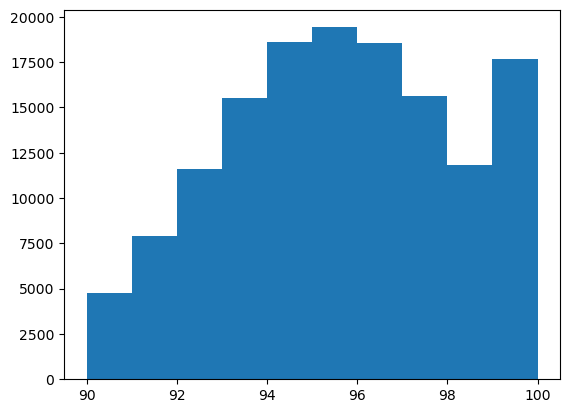

In [53]:
# try it out:
# plot the quality score distribution of alleles that pass the filter

plt.hist(alleles[alleles['filter'] == 'PASS']['quality'])

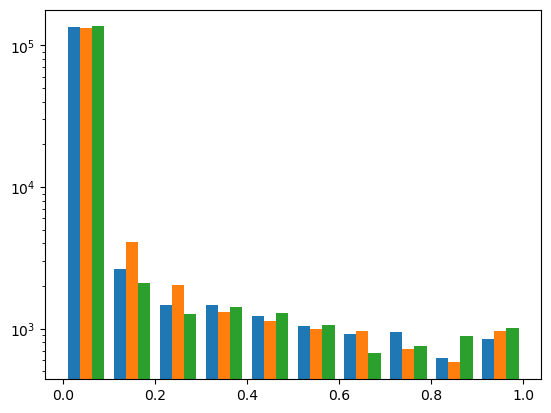

In [54]:
# try it out:
# create a histogram that displays information about the following columns:
# AF (allele frequency, all populations)
# AFR_AF (allele frequency, African population)

# tips:
# 1) you can plot two Series in the same histogram if you put them in a list
# 2) you can adjust the y scale to log scale using plt.yscale('log')

plt.hist([alleles['AF'], alleles['AFR_AF'], alleles['EUR_AF']])
plt.yscale('log')

## Replacing

Previously, we relied heavily on Boolean masking and assignment to update or replace slices/elements in arrays. For example, `nan` resolution is simply a specific case of value replacement that focuses on `nan` values.

With DataFrames/Series, we can use the `.replace()` method to quickly replace single or multiple values in one fell swoop. Although there are many ways that you can provide input to `.replace()`, we'll just teach you the simplest technique, which is providing target and replacement values with a dictionary.

Let's return to `alleles`. Currently, the `filter` column has two values: `'PASS'` and `'LowQ'`.

In [56]:
# just to prove it, let's check:
alleles['filter'].unique()

array(['PASS', 'LowQ'], dtype=object)

For example, let's say that we want to change the values of `filter`, such that `'PASS'` is instead `True`, and `'LowQ'` becomes `False`.

Using a dictionary, we can specify the *target* value and the *substitute* value.

In [57]:
print('Before replacement:\n', alleles['filter'].value_counts())

alleles['filter'].replace({'PASS': True,
                           'LowQ': False}, inplace = True)
print('After replacement:\n', alleles['filter'].value_counts())

Before replacement:
 filter
PASS    141585
LowQ      4997
Name: count, dtype: int64
After replacement:
 filter
True     141585
False      4997
Name: count, dtype: int64


# << Exercises >>


⏸ **Exercise 6** Using column indexing, create a subset of `alleles` called `subset`, which only contains the `AFR_AF`, `AMR_AF`, `EAS_AF`, `EUR_AF`, and `SAS_AF` columns. Which group has the highest mean allele frequency?

In [58]:
### write your code below ###

subset = alleles[['AFR_AF', 'AMR_AF', 'EAS_AF', 'EUR_AF','SAS_AF']]  # Grab only these five columns
subset.mean(axis=0) # Calculate the mean for each column

AFR_AF    0.040214
AMR_AF    0.037317
EAS_AF    0.037553
EUR_AF    0.036325
SAS_AF    0.037009
dtype: float64

⏸ **Exercise 7a** Use the appropriate DataFrame method to summarize/describe the values in each column of `subset`.

In [59]:
### write your code below ###
subset.describe()

,AFR_AF,AMR_AF,EAS_AF,EUR_AF,SAS_AF
count,146582.000000,146582.000000,146582.000000,146582.000000,146582.000000
mean,0.040214,0.037317,0.037553,0.036325,0.037009
std,0.138897,0.144903,0.150717,0.142964,0.143251
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000800,0.000000,0.000000,0.000000,0.000000
75%,0.003800,0.001400,0.001000,0.001000,0.001000
max,1.000000,1.000000,1.000000,1.000000,1.000000


⏸ **Exercise 7b** Print the ```min``` and ```max``` values for the mean and standard deviation for the subset.

In [60]:
### write your code below ###
print("Mean", max(subset.describe().loc["mean"]), min(subset.describe().loc["mean"]))
print("Standard Deviation", max(subset.describe().loc["std"]), min(subset.describe().loc["std"]))

Mean 0.04021396082631348 0.03632537863993913
Standard Deviation 0.15071666826374083 0.1388967747830433


# [Optional] Concatenating rows
This section is optional, just to avoid content overload. Material may be covered at the lecturer's discretion.

____


Let's step back for a moment to think about how DataFrames and Series work together. Each time that we index a row or a column, we obtain a Series: this goes back to the Lego analogy that we used, in which a DataFrame (Lego structure) is simply a composite of Series (individual Legos).

We can easily combine Series and/or DataFrames together using the `pd.concat()` function, which **concatenates** input structures together along a specified `axis`. This method is commonly used to add rows to existing DataFrames, or even whole DataFrames that share the same columns.

In [61]:
# recreating some_alleles
# and creating another sample with a different seed value

some_alleles = alleles.sample(n = 5, random_state = 2023)
more_alleles = alleles.sample(n = 5, random_state = 615)

In [62]:
# examine our rows

some_alleles

,chromosome,position,ID,reference,alternative,quality,filter,AF,AFR_AF,AMR_AF,EAS_AF,EUR_AF,SAS_AF
122447,16,83922205,rs538134989,C,G,94.0,True,0.000200,0.0000,0.0000,0.0,0.000,0.001
114958,14,54894091,rs576163739,T,C,97.0,True,0.000200,0.0008,0.0000,0.0,0.000,0.000
141915,21,36971893,rs184388214,C,T,98.0,True,0.000998,0.0008,0.0029,0.0,0.002,0.000
63960,7,96316607,rs542896211,C,T,100.0,True,0.000200,0.0008,0.0000,0.0,0.000,0.000
139076,21,36877989,rs567424162,A,G,96.0,True,0.000200,0.0008,0.0000,0.0,0.000,0.000


In [63]:
# examine the other rows

more_alleles

,chromosome,position,ID,reference,alternative,quality,filter,AF,AFR_AF,AMR_AF,EAS_AF,EUR_AF,SAS_AF
96828,13,47979663,rs188057594,C,G,89.0,False,0.000200,0.0000,0.0014,0.000,0.0,0.000
132652,19,45580210,rs28594908,A,T,98.0,True,0.036541,0.1316,0.0115,0.001,0.0,0.000
39608,6,42961842,rs536436602,C,G,92.0,True,0.000599,0.0000,0.0029,0.001,0.0,0.000
79756,11,72387152,rs372352451,T,C,95.0,True,0.000399,0.0000,0.0000,0.000,0.0,0.002
23696,3,136278641,rs146927494,C,T,95.0,True,0.000998,0.0038,0.0000,0.000,0.0,0.000


In [64]:
# let's combine these two together

pd.concat([some_alleles, more_alleles], axis = 0)

,chromosome,position,ID,reference,alternative,quality,filter,AF,AFR_AF,AMR_AF,EAS_AF,EUR_AF,SAS_AF
122447,16,83922205,rs538134989,C,G,94.0,True,0.000200,0.0000,0.0000,0.000,0.000,0.001
114958,14,54894091,rs576163739,T,C,97.0,True,0.000200,0.0008,0.0000,0.000,0.000,0.000
141915,21,36971893,rs184388214,C,T,98.0,True,0.000998,0.0008,0.0029,0.000,0.002,0.000
63960,7,96316607,rs542896211,C,T,100.0,True,0.000200,0.0008,0.0000,0.000,0.000,0.000
139076,21,36877989,rs567424162,A,G,96.0,True,0.000200,0.0008,0.0000,0.000,0.000,0.000
96828,13,47979663,rs188057594,C,G,89.0,False,0.000200,0.0000,0.0014,0.000,0.000,0.000
132652,19,45580210,rs28594908,A,T,98.0,True,0.036541,0.1316,0.0115,0.001,0.000,0.000
39608,6,42961842,rs536436602,C,G,92.0,True,0.000599,0.0000,0.0029,0.001,0.000,0.000
79756,11,72387152,rs372352451,T,C,95.0,True,0.000399,0.0000,0.0000,0.000,0.000,0.002
23696,3,136278641,rs146927494,C,T,95.0,True,0.000998,0.0038,0.0000,0.000,0.000,0.000


# [Optional] Cloning files from GitHub

> This section was first introduced in yesterday's session on `numpy`. We've copy-pasted it here for convenience.

[GitHub](https://github.com/) is a website that hosts code and files for software development projects. It serves two major functions: backing up **codebases** (files with data and code that work together) and enabling collaboration between programmers/developers.

We (your staff team) use GitHub as a **repository** for files that are used during PyCamp. We do this so that we have a stable copy of these files that stays out of "I spilled coffee on my laptop the night before PyCamp", or "my laptop was ransomed for cryptocurrency" territory. Moreover, if we accidentally delete a file from the repository, GitHub's **version control**  allows us to roll back the repository to a working version. Neat, right?

The below command allows us to **clone** these files from the GitHub repository to our local runtime's session storage. This allows for us to skip the messy steps of trying to get everyone to download and re-upload the right data.

```
!git clone https://github.com/ccbskillssem/pythonbootcamp.git
```

The `!` operator is used to indicate *special commands* that would normally be run at a computer's **command line**, rather than in Python. This is akin to communicating with a computer (or in Colab, our runtime) directly to tell it that we want to download files using the given file path.

The GitHub file path that you see above points to a single file called a `.git` file. This file does not contain all the data: rather, it provides directions to the GitHub repository of interest, and therefore all the files it contains. In this manner, we never have to worry about giving all the file paths to each file we want: we just pull all the files in the repository by giving its `.git` file path.

# [Optional] More methods for external data

> This section was first introduced in yesterday's session on `numpy`. We've copy-pasted it here for convenience.

This section describes the bare essentials of file uploads/downloads with Colab. For a more in-depth exploration, you can visit the official Google Colab notebook on data I/O [here](https://colab.research.google.com/notebooks/io.ipynb).

## Loading data from your computer
You can use Colab's `Files` menu to upload data from your own computer to Colab's temporary **session storage**. Session storage is reset each time the notebook runtime ends or is otherwise reset.

Go to the left hand panel of the Colab notebook and click on the folder icon at the bottom of the panel. This will bring you to Colab's `Files` menu.

Click on the leftmost icon underneath the `'Files'` title of the panel: it should appear as a piece of paper with an up arrow on it. Follow the prompts to upload your data of choice. Once your file is uploaded, you can access the file path by hovering over the file name, clicking on the three-dot menu, then selecting `Copy path`.

___

**CAUTION**: Files that you upload are NOT retained in the `Files` panel after you close the notebook or reset the runtime. If you would prefer to avoid the upload process, consider the next section on loading data from Google Drive.

___

## Loading data from Google Drive
Google Drive is an excellent cloud storage solution for data you wish to work with in Colab. Colab provides a simple solution for allowing you to access files from Google Drive in Colab: all you have to do is access the `Files` menu by clicking the folder icon on the left hand panel of the Colab notebook.

Once you're in the `Files` menu, click on the third icon below the `'Files'` title: it should appear as a filled-in white folder with the Google Drive icon. Click this button to connect Google Drive to Colab: a pop-up should appear asking you to confirm that you wish to do this, and you may need to wait a few minutes while Google Drive loads.

Once your Drive is mounted, you should see a new folder called `drive` in the `Files` menu. You can access the file path by hovering over the file name, clicking on the three-dot menu, then selecting `Copy path`.